In [ ]:
!curl -LO https://raw.githubusercontent.com/MohamadMerchant/SNLI/master/data.tar.gz
!tar -xvzf data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.1M  100 11.1M    0     0  28.8M      0 --:--:-- --:--:-- --:--:-- 28.8M
SNLI_Corpus/
SNLI_Corpus/snli_1.0_dev.csv
SNLI_Corpus/snli_1.0_train.csv
SNLI_Corpus/snli_1.0_test.csv


In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from numpy.linalg import norm
import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import seaborn as sns

In [ ]:
df_train = pd.read_csv("SNLI_Corpus/snli_1.0_train.csv")
df_valid = pd.read_csv("SNLI_Corpus/snli_1.0_dev.csv")
df_test = pd.read_csv("SNLI_Corpus/snli_1.0_test.csv")

In [ ]:
df_train = (
    df_train[df_train.similarity != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_train = (
    df_train[df_train.similarity != "neutral"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_valid = (
    df_valid[df_valid.similarity != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_valid = (
    df_valid[df_valid.similarity != "neutral"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_test = (
    df_test[df_test.similarity !='-']
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_test = (
    df_test[df_test.similarity !='neutral']
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

In [ ]:
df_train["label"] = df_train["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1
)
#y_train = tf.keras.utils.to_categorical(df_train.label, num_classes=2)

df_valid["label"] = df_valid["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 
)
#y_val = tf.keras.utils.to_categorical(df_valid.label, num_classes=2)

df_test["label"] = df_test["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 
)
#y_test = tf.keras.utils.to_categorical(df_test.label, num_classes=2)

In [5]:
def list_extractor(dataframe, label):
  return dataframe[label].tolist()

In [ ]:
sentence1_train= list_extractor(df_train, 'sentence1')
sentence2_train= list_extractor(df_train, 'sentence2')
label_train= df_train['label'].tolist()

In [6]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 4.7 MB 44.9 MB/s 
     |████████████████████████████████| 1.3 MB 67.2 MB/s 
     |████████████████████████████████| 120 kB 61.4 MB/s 
     |████████████████████████████████| 6.6 MB 44.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3eec9cb214711bc4767d87ecae4d8932cdc4a20fae5fea5ddeab36a4217b699f
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [7]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
list_score=[]
for i in range(len(sentence1_train)):
#Sentences are encoded by calling model.encode()
  try:
    embeddings1 = model.encode(sentence1_train[i])
    embeddings2= model.encode(sentence2_train[i])
    list_score.append(util.dot_score(embeddings1, embeddings2))
  except:
    list_score.append(0.001)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import torch

In [ ]:
X_train=[[torch.tensor(list_score[i]).item() for j in range(1)] for i in range(len(list_score))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
X_train, X_temp, y_train, y_temp= train_test_split(X_train, label_train, test_size=0.3, random_state=0)
X_valid, X_test, y_valid, y_test= train_test_split(X_temp, y_temp, test_size=0.4, random_state=0)

In [ ]:
X_train= np.asarray(X_train)
y_train= np.asarray(y_train) #valori label y per il train
x_test= np.asarray(X_test) #valori x per il test
y_test=np.asarray(y_test) #valori y per il test
x_valid= np.asarray(X_valid) #valori x per validation
y_valid=np.asarray(y_valid) #valori y per validation

SUPPORT VECTOR MACHINE

In [10]:
from sklearn import svm

In [11]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [12]:
from sklearn import metrics as mt

In [ ]:
#create a classifier
cls = svm.SVC(C= .1, kernel="linear", gamma= 1)

#train the model
hist= cls.fit(X_train,y_train)

#predict the response
pred = cls.predict(x_test)

pred_train=cls.predict(X_train)

In [ ]:
#accuracy
print("accuracy:", mt.accuracy_score(y_test, pred))
#precision score
print("precision:", mt.precision_score(y_test,pred))
#recall score
print("recall" , mt.recall_score(y_test,pred))
#auc
print("f1-score", mt.f1_score(y_test, pred))
print("ROC AUC", roc_auc_score(y_test, pred))
print(mt.classification_report(y_test, pred))

accuracy: 0.8118109699270338
precision: 0.7950499721185604
recall 0.8411236159012525
f1-score 0.8174380912478776
ROC AUC 0.8117582373353327
              precision    recall  f1-score   support

           0       0.83      0.78      0.81     21957
           1       0.80      0.84      0.82     22036

    accuracy                           0.81     43993
   macro avg       0.81      0.81      0.81     43993
weighted avg       0.81      0.81      0.81     43993



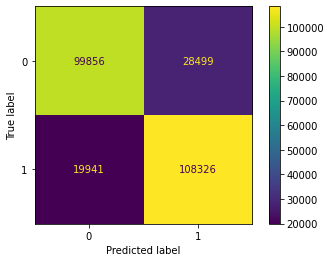

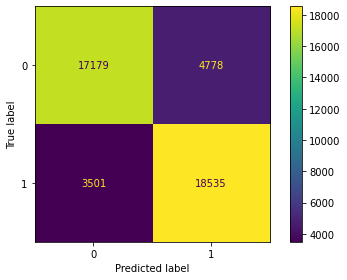

In [ ]:
#fig, ax = plt.subplots(figsize=(12, 6), ncols=1)
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
#cmd_test = mt.ConfusionMatrixDisplay(confusion_matrix=mt.confusion_matrix(y_test, pred), values_format = '.5f')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, pred, values_format='g')
#cmd_train.plot(ax=ax[0], cmap='Greys', colorbar=False)
#cmd_test.plot(ax=ax, cmap='Greys', colorbar=False)
#ax[0].set_title('Trainset')
#ax.set_title('Testset')
plt.tight_layout()
plt.show()

In [13]:
labels=['not entailment', 'entailment']

In [14]:
def check_similarity(sentence1, sentence2, model_used):
   #sentence_pairs = np.array([[str(sentence1), str(sentence2)]])
   model = SentenceTransformer('all-MiniLM-L6-v2')
   embeddings1 = model.encode(sentence1)
   embeddings2= model.encode(sentence2)
   similarity= util.dot_score(embeddings1, embeddings2)
   #print(similarity)
   proba = model_used.predict(similarity)
   #print(proba)
   label = labels[proba[0]]
   #print(idx)
   #proba = f"{proba[idx]: .2f}%"
   #pred = labels[idx]
   return label

In [ ]:
print(check_similarity('A black race car starts up in front of a crowd of people.','A man is driving down a lonely road.',cls))

not entailment


In [ ]:
print(check_similarity('A man inspects the uniform of a figure in some East Asian country.','The man is sleeping', cls))

not entailment


In [ ]:
print(check_similarity('A soccer game with multiple males playing.','Some men are playing a sport.', cls))

entailment


LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(x_test)
pred_train= logmodel.predict(X_train)

In [ ]:
print("precision:", mt.precision_score(y_test,predictions))
print("accuracy:", mt.accuracy_score(y_test, predictions))
print("recall" , mt.recall_score(y_test,predictions))
print("ROC AUC", roc_auc_score(y_test, predictions))
print("f1-score", mt.f1_score(y_test, predictions))

print(mt.classification_report(y_test, predictions))

precision: 0.8021958640151682
accuracy: 0.8106744254767804
recall 0.8256035578144854
ROC AUC 0.810647568404897
f1-score 0.8137314100413732
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     21957
           1       0.80      0.83      0.81     22036

    accuracy                           0.81     43993
   macro avg       0.81      0.81      0.81     43993
weighted avg       0.81      0.81      0.81     43993



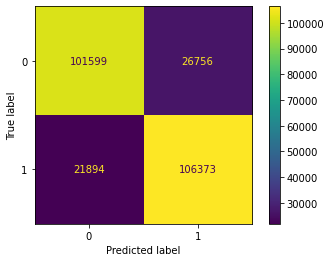

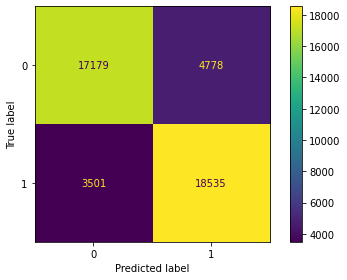

In [ ]:
#fig, ax = plt.subplots(figsize=(12, 6), ncols=1)
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
#cmd_test = mt.ConfusionMatrixDisplay(confusion_matrix=mt.confusion_matrix(y_test, pred), values_format = '.5f')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, pred, values_format='g')
#cmd_train.plot(ax=ax[0], cmap='Greys', colorbar=False)
#cmd_test.plot(ax=ax, cmap='Greys', colorbar=False)
#ax[0].set_title('Trainset')
#ax.set_title('Testset')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


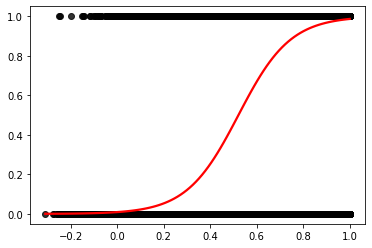

In [ ]:
sns.regplot(x=X_train, y=y_train, data=df_train, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

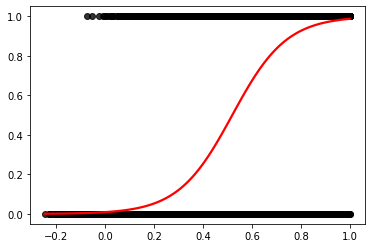

In [ ]:
sns.regplot(x=x_test, y=y_test, data=df_train, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [ ]:
print(check_similarity('Two women are observing something together','Two women are standing with their eyes closed.', logmodel))#wrong

entailment


In [ ]:
print(check_similarity('An older and younger man smiling.','Two men are smiling and laughing at the cats playing on the floor', logmodel))

not entailment


KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
pred_train= knn.predict(X_train)
prediction_knn = knn.predict(X_test)

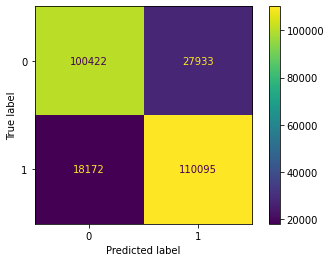

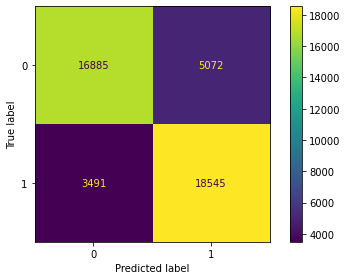

precision: 0.7852394461616632
accuracy: 0.8053553974495943
recall 0.8415774187692866
f1-score 0.8124329178805336
ROC AUC 0.8052902350939843
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     21957
           1       0.79      0.84      0.81     22036

    accuracy                           0.81     43993
   macro avg       0.81      0.81      0.81     43993
weighted avg       0.81      0.81      0.81     43993



In [ ]:
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, prediction_knn, values_format='g')
plt.tight_layout()
plt.show()

print("precision:", mt.precision_score(y_test,prediction_knn))
print("accuracy:", mt.accuracy_score(y_test, prediction_knn))
print("recall" , mt.recall_score(y_test,prediction_knn))
print("f1-score", mt.f1_score(y_test, prediction_knn))
print("ROC AUC", roc_auc_score(y_test, prediction_knn))
print(mt.classification_report(y_test, prediction_knn))

In [ ]:
print(check_similarity('Tim has bought fish tonight','Tim has spent money tonight', knn))

entailment


TEST WITH MNLI

In [17]:
df_train= pd.read_json("multinli_1.0_train.jsonl", lines=True)

In [18]:
df_train.dropna(axis=0, inplace=True)

df_train = (
    df_train[df_train.gold_label != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

df_train = (
    df_train[df_train.gold_label != "neutral"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

In [19]:
df_train["label"] = df_train["gold_label"].apply(
    lambda x: 0 if x == "contradiction" else 1
)

In [20]:
sentence1_train= list_extractor(df_train, 'sentence1')
sentence2_train= list_extractor(df_train, 'sentence2')
label_train= df_train['label'].tolist()

In [ ]:
sentence1_train[:5]

['He still behaves like an adolescent moron.',
 'Its carriers provide twice weekly delivery to various areas in Sweden for large volume customers.',
 'Jon was no seasoned climber but he did his best not to wake the rest of the group as he climbed to the outcrop.',
 'It was a world of anarchy, from your point of view.',
 "Our advertising is based on a breadth of research from which we develop specific campaigns depending on the drug and the demographic we're targeting."]

In [21]:
list_score=[]
for i in range(len(sentence1_train)):
#Sentences are encoded by calling model.encode()
  try:
    embeddings1 = model.encode(sentence1_train[i])
    embeddings2= model.encode(sentence2_train[i])
    list_score.append(util.dot_score(embeddings1, embeddings2))
  except:
    list_score.append(0.001)

In [22]:
X_train=[[torch.tensor(list_score[i]).item() for j in range(1)] for i in range(len(list_score))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [23]:
X_train, X_temp, y_train, y_temp= train_test_split(X_train, label_train, test_size=0.3, random_state=0)
X_valid, X_test, y_valid, y_test= train_test_split(X_temp, y_temp, test_size=0.4, random_state=0)

In [24]:
X_train= np.asarray(X_train)
y_train= np.asarray(y_train) #valori label y per il train
x_test= np.asarray(X_test) #valori x per il test
y_test=np.asarray(y_test) #valori y per il test
x_valid= np.asarray(X_valid) #valori x per validation
y_valid=np.asarray(y_valid) #valori y per validation

SVM

In [25]:
#create a classifier
cls = svm.SVC(C= .1, kernel="linear", gamma= 1)

#train the model
hist= cls.fit(X_train,y_train)

#predict the response
pred = cls.predict(x_test)

pred_train=cls.predict(X_train)

In [26]:
#accuracy
print("accuracy:", mt.accuracy_score(y_test, pred))
#precision score
print("precision:", mt.precision_score(y_test,pred))
#recall score
print("recall" , mt.recall_score(y_test,pred))
#auc
print("f1-score", mt.f1_score(y_test, pred))
print("ROC AUC", roc_auc_score(y_test, pred))
print(mt.classification_report(y_test, pred))

accuracy: 0.6915045994206958
precision: 0.6776022192739115
recall 0.7210884353741497
f1-score 0.6986693197363512
ROC AUC 0.6917409338222185
              precision    recall  f1-score   support

           0       0.71      0.66      0.68     15835
           1       0.68      0.72      0.70     15582

    accuracy                           0.69     31417
   macro avg       0.69      0.69      0.69     31417
weighted avg       0.69      0.69      0.69     31417



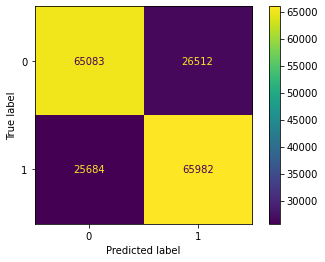

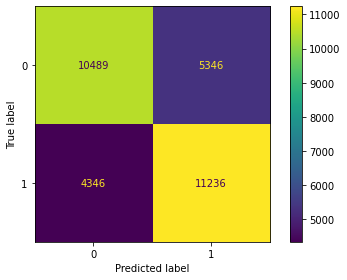

In [51]:
#fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
#cmd_test = mt.ConfusionMatrixDisplay(confusion_matrix=mt.confusion_matrix(y_test, pred), values_format = '.5f')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, pred, values_format='g')
#cmd_train.plot(ax=ax[0], cmap='Greys', colorbar=False)
#cmd_test.plot(ax=ax, cmap='Greys', colorbar=False)
#ax.set_title('Trainset')
#ax.set_title('Testset')
plt.tight_layout()
plt.show()

In [27]:
print(check_similarity('A black race car starts up in front of a crowd of people.','A man is driving down a lonely road.',cls))

not entailment


In [28]:
print(check_similarity('A soccer game with multiple males playing.','Some men are playing a sport.', cls))

entailment


LOGISTIC REGRESSION

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(x_test)
pred_train= logmodel.predict(X_train)

In [30]:
print("precision:", mt.precision_score(y_test,predictions))
print("accuracy:", mt.accuracy_score(y_test, predictions))
print("recall" , mt.recall_score(y_test,predictions))
print("ROC AUC", roc_auc_score(y_test, predictions))
print("f1-score", mt.f1_score(y_test, predictions))

print(mt.classification_report(y_test, predictions))

precision: 0.6800024394706349
accuracy: 0.6919183881338129
recall 0.7155692465665512
ROC AUC 0.6921073261566573
f1-score 0.697332624534851
              precision    recall  f1-score   support

           0       0.70      0.67      0.69     15835
           1       0.68      0.72      0.70     15582

    accuracy                           0.69     31417
   macro avg       0.69      0.69      0.69     31417
weighted avg       0.69      0.69      0.69     31417



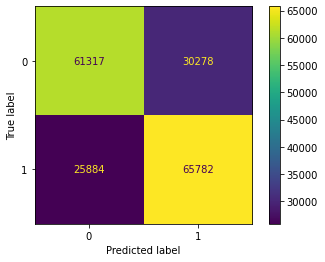

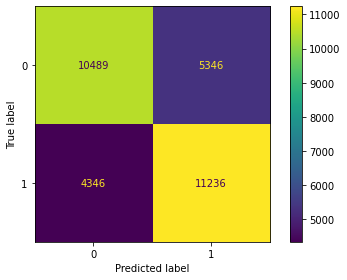

In [31]:
#fig, ax = plt.subplots(figsize=(12, 6), ncols=1)
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
#cmd_test = mt.ConfusionMatrixDisplay(confusion_matrix=mt.confusion_matrix(y_test, pred), values_format = '.5f')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, pred, values_format='g')
#cmd_train.plot(ax=ax[0], cmap='Greys', colorbar=False)
#cmd_test.plot(ax=ax, cmap='Greys', colorbar=False)
#ax[0].set_title('Trainset')
#ax.set_title('Testset')
plt.tight_layout()
plt.show()

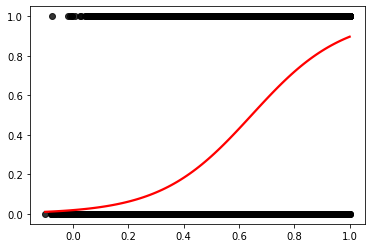

In [ ]:
sns.regplot(x=X_train, y=y_train, data=df_train, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [ ]:
df_test= pd.DataFrame(x_test,columns=['similarity'])

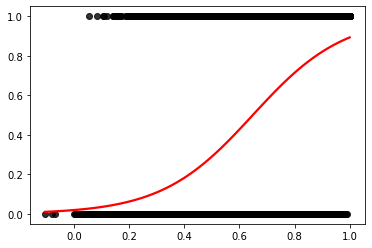

In [ ]:
sns.regplot(x=x_test, y=y_test, data=df_test, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [32]:
print(check_similarity('Two women are observing something together','Two women are standing with their eyes closed.', logmodel))#wrong

not entailment


In [33]:
print(check_similarity('An older and younger man smiling.','Two men are smiling and laughing at the cats playing on the floor', logmodel))

not entailment


KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [47]:
pred_train= knn.predict(X_train)
prediction_knn = knn.predict(X_test)

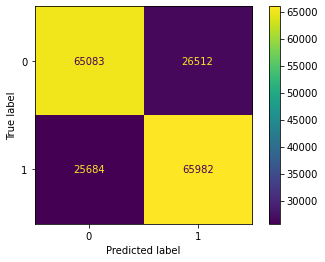

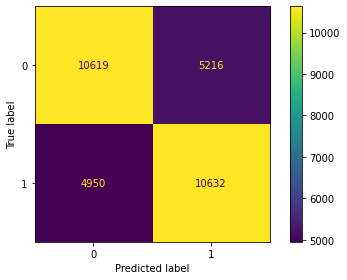

precision: 0.6708732963149924
accuracy: 0.6764172263424261
recall 0.6823257604928764
f1-score 0.6765510658606427
ROC AUC 0.6764644274519954
              precision    recall  f1-score   support

           0       0.68      0.67      0.68     15835
           1       0.67      0.68      0.68     15582

    accuracy                           0.68     31417
   macro avg       0.68      0.68      0.68     31417
weighted avg       0.68      0.68      0.68     31417



In [48]:
cmd_train = mt.ConfusionMatrixDisplay.from_predictions(y_train, pred_train, values_format='g')
cmd_test=mt.ConfusionMatrixDisplay.from_predictions(y_test, prediction_knn, values_format='g')
plt.tight_layout()
plt.show()

print("precision:", mt.precision_score(y_test,prediction_knn))
print("accuracy:", mt.accuracy_score(y_test, prediction_knn))
print("recall" , mt.recall_score(y_test,prediction_knn))
print("f1-score", mt.f1_score(y_test, prediction_knn))
print("ROC AUC", roc_auc_score(y_test, prediction_knn))
print(mt.classification_report(y_test, prediction_knn))

In [49]:
print(check_similarity('Two women are observing something together','Two women are standing with their eyes closed.', knn))

entailment


In [50]:
print(check_similarity('Two women are observing something together','Two women are standing with their eyes closed.', knn))#wrong

entailment
